In [105]:
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import utils
import jsonpickle

In [106]:
parameter_file_name = 'best_parameter_from_direct_experiment.json'

In [107]:
free_parameters = jsonpickle.decode(open(parameter_file_name).read())

In [108]:
free_parameters

{'beta_1a': 6.512293107807636,
 'beta_1b': 4.228252377361059,
 'beta_2a': 7.586059048771858,
 'beta_2b': 12.636847794055939,
 'beta_3a': 15.295164547860622,
 'beta_3b': 18.81494091823697,
 'beta_4a': 15.888922940939665,
 'beta_4b': 13.921189960092306,
 'beta_5a': 14.420045968145132,
 'beta_5b': 2.988985925912857,
 'beta_6a': 0.668520200997591,
 'beta_6b': 8.830392304807901,
 'cov_para_1': -0.44670147467404603,
 'cov_para_10': -0.7219397708773613,
 'cov_para_11': 0.315260410308838,
 'cov_para_12': 0.534031873382628,
 'cov_para_13': 0.770831023156643,
 'cov_para_14': 0.4556941755115985,
 'cov_para_15': 0.13865337353199714,
 'cov_para_2': -0.384199352748692,
 'cov_para_3': -0.5402261786162854,
 'cov_para_4': -0.38594632912427185,
 'cov_para_5': -0.3368985900655389,
 'cov_para_6': -0.8794326251372695,
 'cov_para_7': 0.15932363457977783,
 'cov_para_8': 0.7222693640738725,
 'cov_para_9': 0.28681615199893706,
 'lambda_expon_0': 0.09062741027213633,
 'lambda_expon_1': 0.48923654077574613,
 'la

In [109]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']
free_para7 = free_parameters['cov_para_7']
free_para8 = free_parameters['cov_para_8']
free_para9 = free_parameters['cov_para_9']
free_para10 = free_parameters['cov_para_10']
free_para11 = free_parameters['cov_para_11']
free_para12 = free_parameters['cov_para_12']
free_para13 = free_parameters['cov_para_13']
free_para14 = free_parameters['cov_para_14']
free_para15 = free_parameters['cov_para_15']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
    diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
else:
    diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)

if (1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)<0:
    diag_6 = np.sqrt(np.abs(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2))
else:
    diag_6 = np.sqrt(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)


lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0,0],
                        [free_para1,diag_2,0,0,0,0],
                        [free_para2,free_para3,diag_3,0,0,0],
                        [free_para4,free_para5,free_para6,diag_4,0,0],
                        [free_para7,free_para8,free_para9,free_para10,diag_5,0],
                        [free_para11,free_para12,free_para13,free_para14,free_para15,diag_6]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_5a'],
'b': free_parameters['beta_5b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_6a'],
'b': free_parameters['beta_6b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3,4,5]

new_dist = Multivariate.from_dict(copula_parameters)

In [110]:
cov_matrix

array([[ 1.        , -0.44670147, -0.38419935, -0.38594633,  0.15932363,
         0.31526041],
       [-0.44670147,  1.        , -0.3117088 , -0.12901467,  0.57503207,
         0.33696198],
       [-0.38419935, -0.3117088 ,  1.        , -0.32814641, -0.23666259,
         0.16749769],
       [-0.38594633, -0.12901467, -0.32814641,  1.07171394, -0.69376344,
        -0.89319217],
       [ 0.15932363,  0.57503207, -0.23666259, -0.69376344,  1.30103519,
         0.38183913],
       [ 0.31526041,  0.33696198,  0.16749769, -0.89319217,  0.38183913,
         1.41128315]])

In [111]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

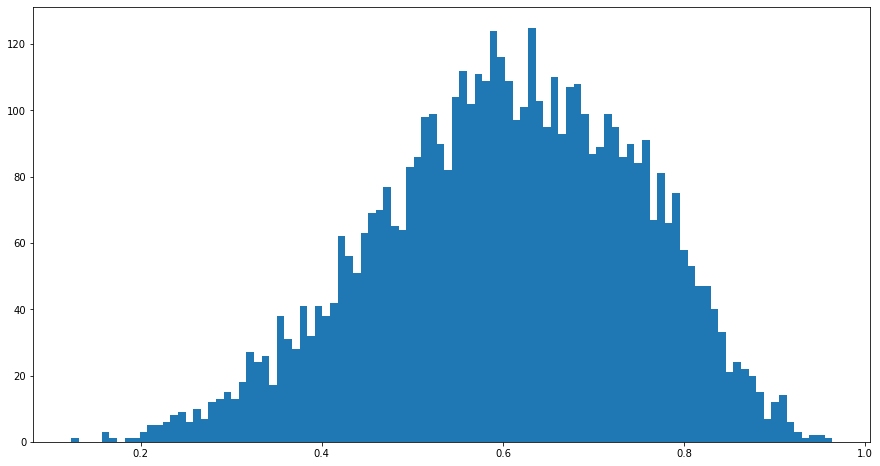

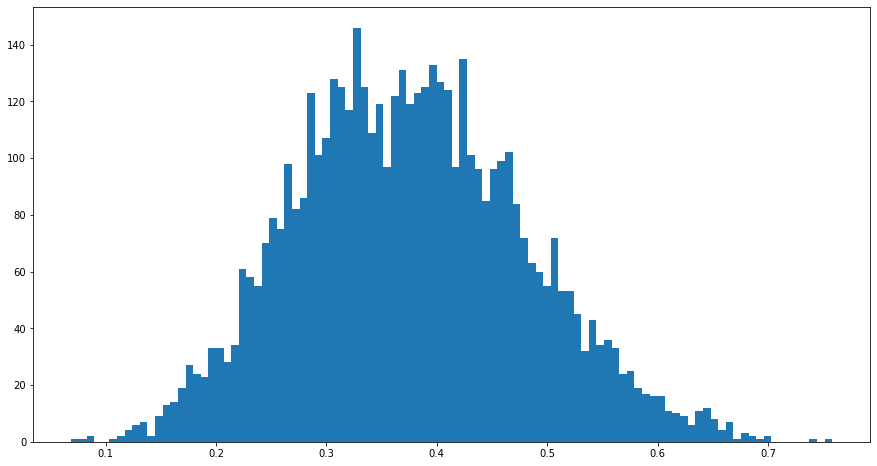

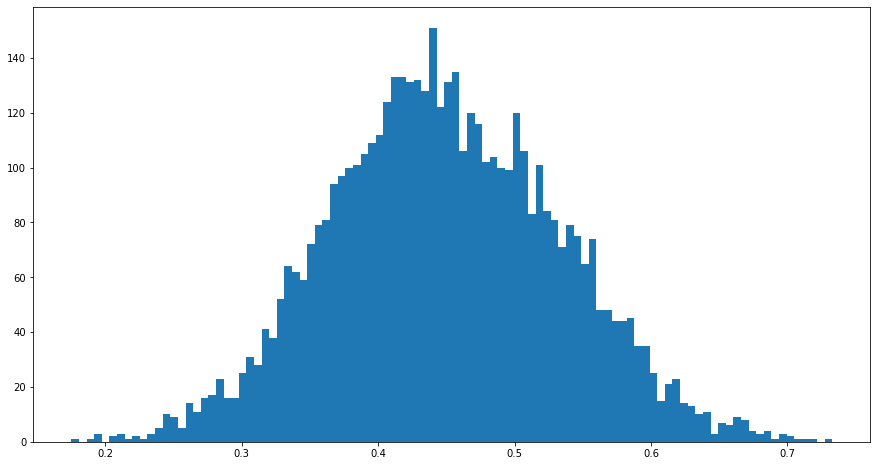

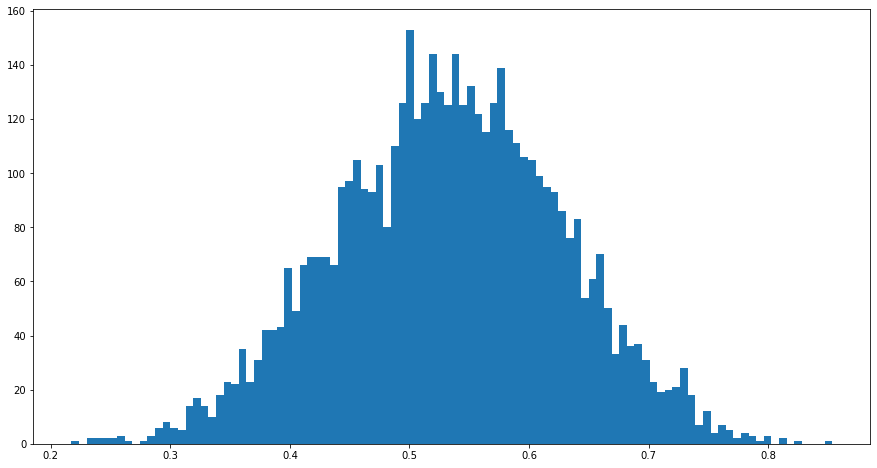

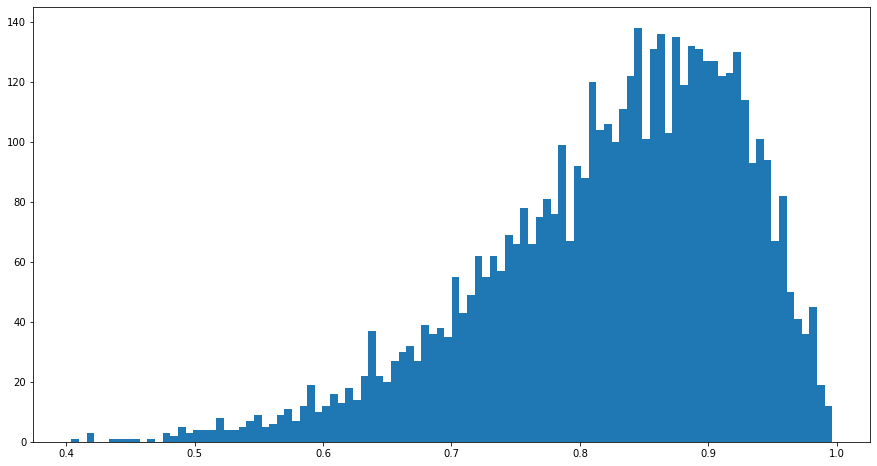

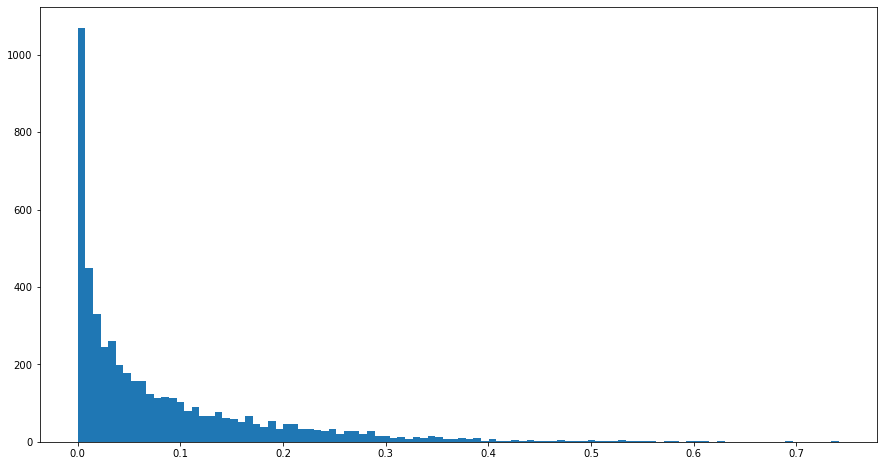

In [112]:
plt.rcParams["figure.figsize"] = (15,8)

for index in range(0,6):
    plt.hist(samples[index],bins = 100)
    plt.show()

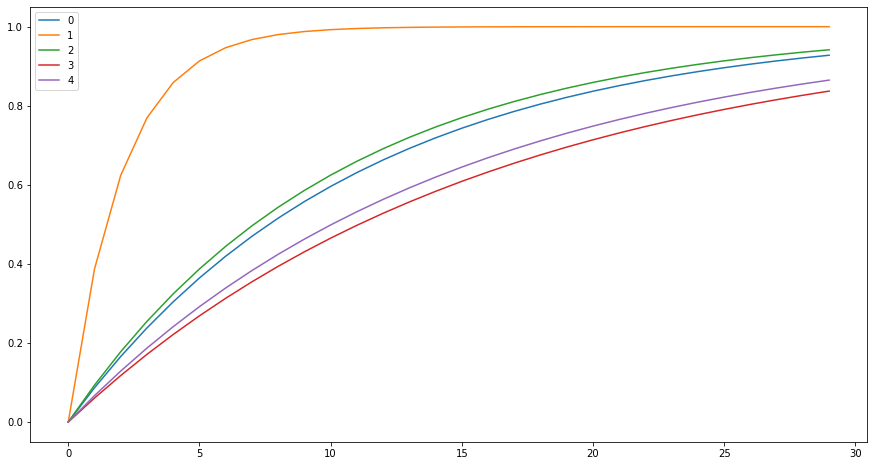

In [113]:
#other parameters needed for transforming the features
lambda_expon_0 = free_parameters['lambda_expon_0']
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expon_4 = free_parameters['lambda_expon_4']
lambda_expons = [lambda_expon_0,lambda_expon_1,lambda_expon_2,lambda_expon_3,lambda_expon_4]

for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [148]:
import trading_vix
env = trading_vix.trading_vix()

In [161]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)

price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 6
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index] = 1
            #print('record sell action')

    action_history2[0,time_index] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [162]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


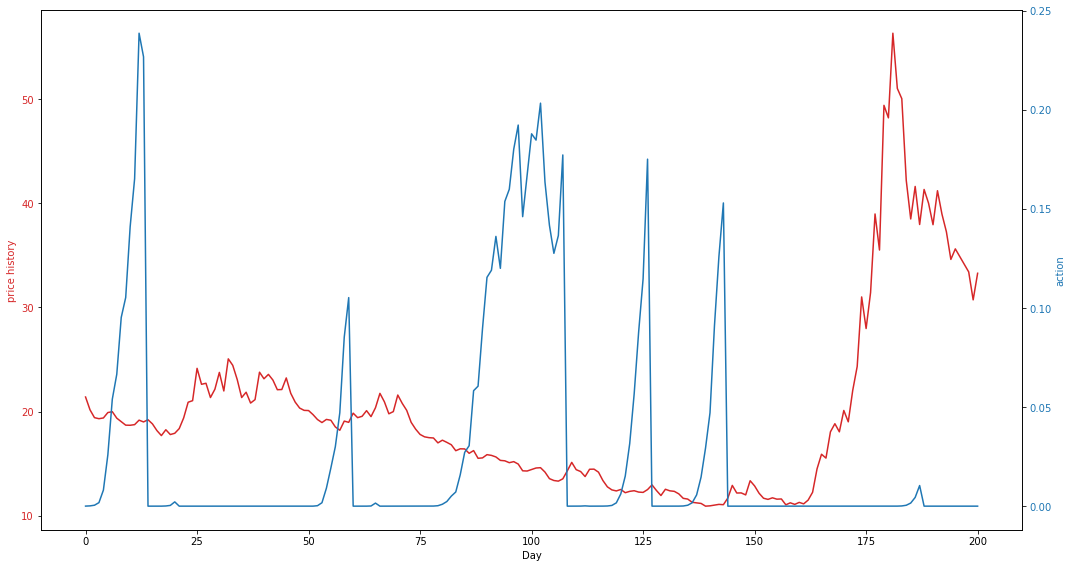

In [163]:


plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



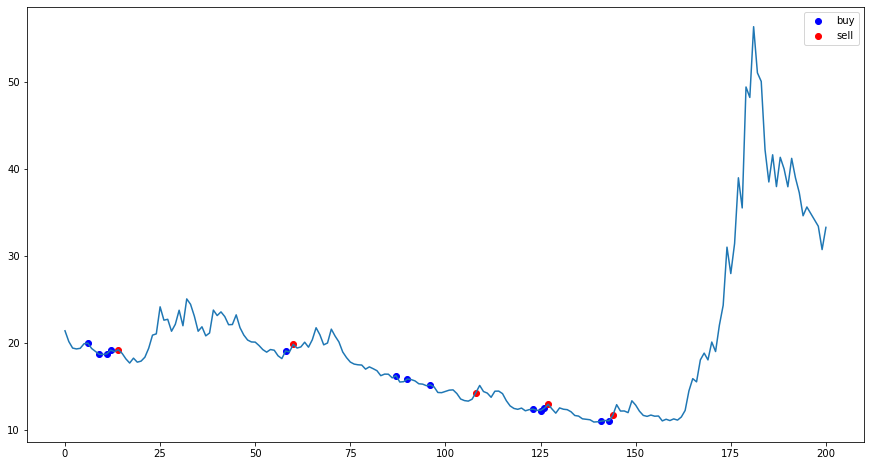

In [164]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()


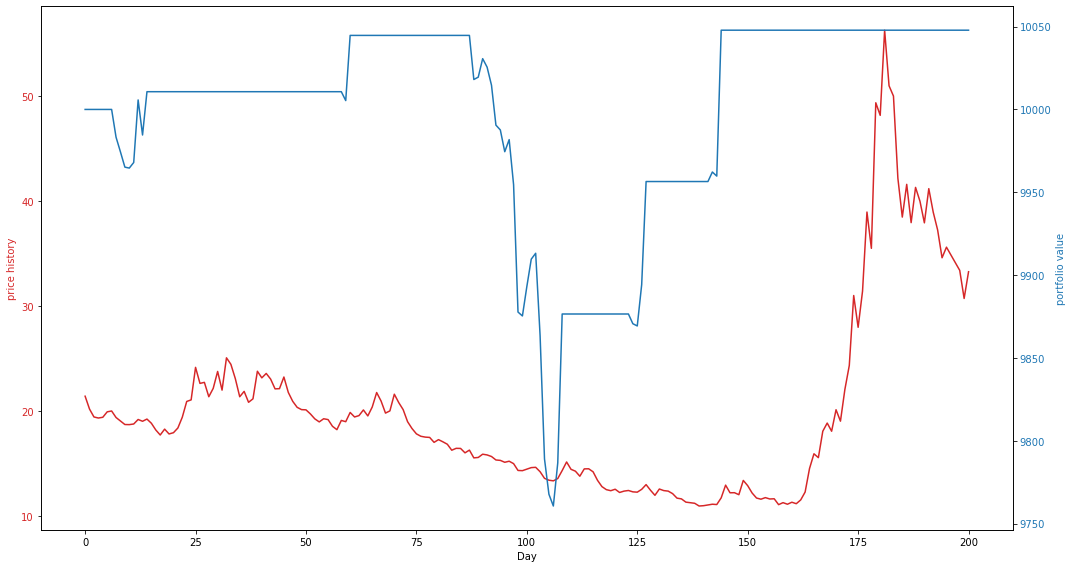

In [165]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

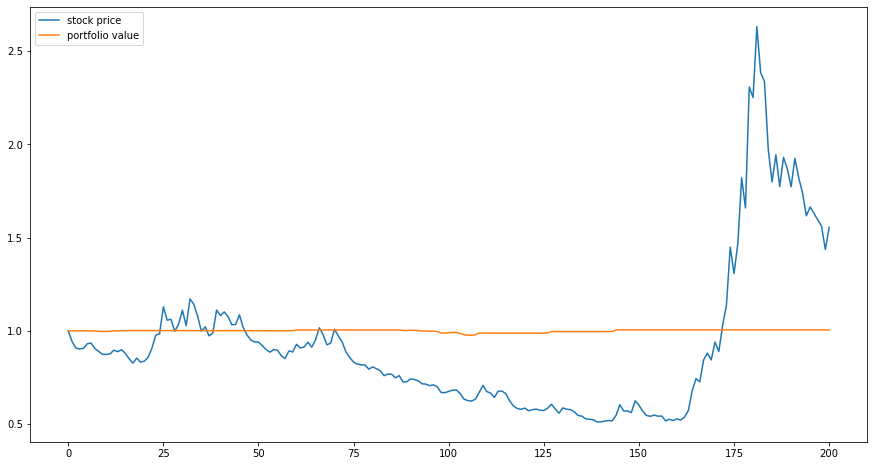

In [166]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock price')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio value')
plt.legend()
plt.show()

In [167]:
begin_df_index = 55
end_df_index = 95

df = pd.DataFrame()
df['suggested stock-total portfolio ratio'] = action_history2[0,:][begin_df_index:end_df_index].tolist()
df['transaction_value'] = transaction_value_history[begin_df_index:end_df_index]
df['execute_action'] = action_history1[0,:][begin_df_index:end_df_index].tolist()
df['stock price'] = price_history[begin_df_index:end_df_index]
df['portfolio value'] = portfolio_value_history[begin_df_index:end_df_index]
df

,suggested stock-total portfolio ratio,transaction_value,execute_action,stock price,portfolio value
0,1.927330e-02,9.091013e+01,0.0,19.170000,10010.708449
1,3.001883e-02,1.929393e+02,0.0,18.530001,10010.708446
2,4.707772e-02,3.005096e+02,0.0,18.209999,10010.708445
3,8.526327e-02,4.712813e+02,2.0,19.090000,10010.708449
4,1.052029e-01,8.535457e+02,0.0,18.969999,10005.343004
5,7.159960e-14,2.044105e+02,1.0,19.850000,10044.689318
6,7.207590e-11,8.875266e+02,0.0,19.420000,10044.689318
7,4.190940e-08,7.232765e-07,0.0,19.549999,10044.689318
8,6.618370e-06,4.209662e-04,0.0,20.090000,10044.689318
9,8.269441e-05,6.647947e-02,0.0,19.520000,10044.689318
